In [1]:
import pandas as pd
a=pd.read_table("/home/jash/Desktop/petplan/Profitability1.txt", sep='|', lineterminator='\n', error_bad_lines=False)

Skipping line 267909: expected 33 fields, saw 34

Skipping line 299539: expected 33 fields, saw 34

/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data=pd.DataFrame(data=a,index=None)
data = data.sample(frac=1).reset_index(drop=True)
import math
import numpy as np
data['LossRatio'].fillna(0, inplace=True)
data['L']=0
data.loc[data['LossRatio'] >8.451531 ,'L'] = 1
data.to_csv("/home/jash/Desktop/petplan/Profitability.csv")
Y=data['L']
y=pd.DataFrame(Y)
x=pd.DataFrame(data)

m=x.loc[x['PolicyForm']!='Introductory']
q=pd.DataFrame(m)
m2=q.loc[q['PolicyForm']!='Intro']
m3=pd.DataFrame(m2)
m4=m3.loc[m3['Quadrant']=='LowTenure-HighLR']
x=pd.DataFrame(m4)

print x.head()


     LossRatio  Duration            PetId   StartDate     EndDate  \
43   30.476581       289    US1248409Abby  2017-10-12  2018-10-11   
95    1.163478       361  US2050569paulie  2017-08-01  2018-07-31   
122   0.963040       273      US1757740Bo  2016-08-05  2017-05-04   
123   0.579940       366   US1430949Ollie  2015-10-01  2016-09-30   
129   1.398240       220     US2188064Uno  2017-12-20  2018-12-19   

    LastPolicyRef  TotalClaimsAmtPaid  TotalEarnedPremium  \
43         533793           13482.104          442.375863   
95         496221            1261.358         1084.127507   
122        280992             386.665          401.504466   
123        288652             196.420          338.690000   
129        573833             169.600          121.295342   

                            BreedName  Currentage ...   Surname  GivenName  \
43   Mixed Breed Small ( up to 22lb )         4.0 ...  Corbelle     Ileana   
95                    English Bulldog         0.0 ...   fabisc

In [3]:
x['LossRatio'].max()

526.2746201058766

In [4]:
len(x.loc[x['L']==1])

4189

In [5]:
len(x)

16161

In [6]:

x.isnull().sum()

LossRatio                           0
Duration                            0
PetId                               0
StartDate                           0
EndDate                             0
LastPolicyRef                       0
TotalClaimsAmtPaid                  0
TotalEarnedPremium                  0
BreedName                           0
Currentage                          0
CopayPct                            0
Deductible                          0
PetType                             0
PolicyForm                          0
CarrierCd                           0
ClaimNumber                         0
ClaimAmount                         0
ClaimDetails                        0
ConditionGrp                        0
Claimcodecategory                   0
Severity                           46
CustomerNumber                     61
Country                            61
PhoneNumber                        92
Surname                            63
GivenName                          67
CustomerMail

In [7]:
x.drop(['LossRatio'],axis=1,inplace=True)
x.drop(['CustomerNumber','PhoneNumber','Surname','GivenName','CustomerMailingAddr_Addr1','CustomerMailingAddr_City','CustomerMailingAddr_StateProvCd',
       'CustomerMailingAddr_PostalCode','PetId','StartDate','EndDate','LastPolicyRef'],axis=1,inplace=True)



In [8]:
p=pd.DataFrame(x)

In [9]:
p.drop(['ClaimNumber','ClaimAmount','Severity','ClaimDetails','ConditionGrp','Claimcodecategory','claimdurationInception'],axis=1,inplace=True)

In [10]:
p.isnull().sum()

Duration               0
TotalClaimsAmtPaid     0
TotalEarnedPremium     0
BreedName              0
Currentage             0
CopayPct               0
Deductible             0
PetType                0
PolicyForm             0
CarrierCd              0
Country               61
Quadrant               0
churn\r                0
L                      0
dtype: int64

In [11]:


p['TotalClaimsAmtPaid'].fillna(0, inplace=True)

In [12]:
p.isnull().sum()

Duration               0
TotalClaimsAmtPaid     0
TotalEarnedPremium     0
BreedName              0
Currentage             0
CopayPct               0
Deductible             0
PetType                0
PolicyForm             0
CarrierCd              0
Country               61
Quadrant               0
churn\r                0
L                      0
dtype: int64

In [13]:
p.dropna(how='any',inplace=True)

In [14]:
p.isnull().sum()

Duration              0
TotalClaimsAmtPaid    0
TotalEarnedPremium    0
BreedName             0
Currentage            0
CopayPct              0
Deductible            0
PetType               0
PolicyForm            0
CarrierCd             0
Country               0
Quadrant              0
churn\r               0
L                     0
dtype: int64

In [15]:
p.drop(['Quadrant','TotalClaimsAmtPaid','TotalEarnedPremium'],axis=1,inplace=True)

In [16]:
print p.shape

(16100, 11)


In [17]:

import h2o
from h2o.estimators import H2ORandomForestEstimator
h2o.init()
df = h2o.H2OFrame(p)
y = 'L'
x=df.col_names
print df
x.remove(y)
df[y] = df[y].asfactor()
train, valid, test = df.split_frame(ratios=[.8,.1])
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
gbm_cv3 = H2OGradientBoostingEstimator(nfolds=3,max_depth=4,ntrees=130)
gbm_cv3.train(x=x, y=y, training_frame=train)
## Getting all cross validated models 
all_models = gbm_cv3.cross_validation_models()
print("Total cross validation models: " + str(len(all_models)))

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-linux64) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-linux64) (build 25.121-b15, mixed mode)
  Starting server from /home/jash/anaconda3/envs/py27/h2o_jar/h2o.jar
  Ice root: /tmp/tmpaWDm89
  JVM stdout: /tmp/tmpaWDm89/h2o_jash_started_from_python.out
  JVM stderr: /tmp/tmpaWDm89/h2o_jash_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,5 months !!!
H2O cluster name:,H2O_from_python_jash_pc7tuz
H2O cluster total nodes:,1
H2O cluster free memory:,1.714 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/h2o/h2o.py:562: UserWarning: [Lwater.parser.ParseWriter$ParseErr;@74bd9a62
  warnings.warn(w)


Parse progress: |█████████████████████████████████████████████████████████| 100%


/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/h2o/job.py:69: UserWarning: ParseError at file upload_8f592080e4c54c474649fb3f71b04114 at line 0 ( destination line 0 )  at byte offset 111; error = 'Unmatched quote char "'
  warnings.warn(w)
/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/h2o/job.py:69: UserWarning: ParseError at file upload_8f592080e4c54c474649fb3f71b04114 at line 2 ( destination line 2 )  at byte offset 117; error = 'Unmatched quote char "'
  warnings.warn(w)


Duration,BreedName,Currentage,CopayPct,Deductible,PetType,PolicyForm,CarrierCd,Country,churn,L
nan,BreedName,nan,nan,nan,PetType,nan,CarrierCd,Country,nan,nan
nan,,nan,nan,nan,,nan,,,nan,nan
289,Mixed Breed Small ( up to 22lb ),4,0.8,250,Dog,15000,XLC,US,0,1
361,English Bulldog,0,0.8,250,Dog,15000,XLC,US,0,0
273,Mixed Breed Large (71lb +),0,0.9,250,Dog,15000,XLC,US,1,0
366,Maltese Mix,4,0.8,400,Dog,15000,XLC,US,1,0
220,Domestic Shorthair,0,0.8,300,Cat,15000,XLC,US,0,0
246,Irish Setter,9,0.8,1000,Dog,5000,XLC,US,1,0
239,Doberman Pinscher,0,0.8,250,Dog,15000,XLC,US,0,0
147,Jack Russell Terrier Mix,5,1,200,Dog,nan,ALZ,US,1,0



gbm Model Build progress: |███████████████████████████████████████████████| 100%
Total cross validation models: 3


In [18]:
# Use same data as above

# GBM hyperparameters
gbm_params2 = {'learn_rate': [i * 0.01 for i in range(1, 11)],
                'max_depth': range(1,10),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)],
                 'min_rows':1000}

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 36, 'seed': 1}

# Train and validate a random grid of GBMs
gbm_grid2 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid2',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria)
gbm_grid2.train(x=x, y=y,
                training_frame=train,
                validation_frame=valid,
                ntrees=100,
                seed=1)

# Get the grid results, sorted by validation AUC
gbm_gridperf2 = gbm_grid2.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf2

# Grab the top GBM model, chosen by validation AUC
best_gbm2 = gbm_gridperf2.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf2 = best_gbm2.model_performance(test)

best_gbm_perf2.auc()  #0.7811331652127048

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


0.8404395499618612

In [33]:
params_list = []
for key, value in best_gbm2.params.iteritems():
    params_list.append(str(key)+" = "+str(value['actual']))
params_list

['learn_rate = 0.1',
 'fold_column = None',
 'col_sample_rate_per_tree = 1.0',
 'learn_rate_annealing = 1.0',
 'score_tree_interval = 0',
 'sample_rate_per_class = None',
 'seed = 1',
 'keep_cross_validation_predictions = False',
 "model_id = {u'URL': u'/3/Models/gbm_grid2_model_8', u'type': u'Key<Model>', u'name': u'gbm_grid2_model_8', u'__meta': {u'schema_name': u'ModelKeyV3', u'schema_version': 3, u'schema_type': u'Key<Model>'}}",
 'nfolds = 0',
 'max_abs_leafnode_pred = 1.79769313486e+308',
 'offset_column = None',
 'categorical_encoding = AUTO',
 'pred_noise_bandwidth = 0.0',
 'stopping_tolerance = 0.001',
 'fold_assignment = AUTO',
 "training_frame = {u'URL': u'/3/Frames/py_4_sid_b108', u'type': u'Key<Frame>', u'name': u'py_4_sid_b108', u'__meta': {u'schema_name': u'FrameKeyV3', u'schema_version': 3, u'schema_type': u'Key<Frame>'}}",
 'max_runtime_secs = 0.0',
 'calibrate_model = False',
 'checkpoint = None',
 'balance_classes = False',
 'r2_stopping = 1.79769313486e+308',
 "vali

In [35]:
best_gbm2.train(x=x, y=y, training_frame=df)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [37]:
best_gbm2.model_performance(valid)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.0976027067171
RMSE: 0.312414319001
LogLoss: 0.323875448539
Mean Per-Class Error: 0.157806165452
AUC: 0.92176767619
Gini: 0.84353535238
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.351653836381: 


,0,1,Error,Rate
0,1141.0,90.0,0.0731,(90.0/1231.0)
1,108.0,318.0,0.2535,(108.0/426.0)
Total,1249.0,408.0,0.1195,(198.0/1657.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3516538,0.7625899,170.0
max f2,0.2182342,0.7890400,246.0
max f0point5,0.4847441,0.8138781,118.0
max accuracy,0.3634764,0.8811104,165.0
max precision,0.9389237,1.0,0.0
max recall,0.0647939,1.0,349.0
max specificity,0.9389237,1.0,0.0
max absolute_mcc,0.3516538,0.6830850,170.0
max min_per_class_accuracy,0.2748820,0.8286385,210.0
max mean_per_class_accuracy,0.3319647,0.8421938,182.0


Gains/Lift Table: Avg response rate: 25.71 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0102595,0.9141897,3.8896714,3.8896714,1.0,1.0,0.0399061,0.0399061,288.9671361,288.9671361
,2,0.0205190,0.8869539,3.8896714,3.8896714,1.0,1.0,0.0399061,0.0798122,288.9671361,288.9671361
,3,0.0313820,0.8754075,3.8896714,3.8896714,1.0,1.0,0.0422535,0.1220657,288.9671361,288.9671361
,4,0.0404345,0.8552373,3.6303599,3.8316166,0.9333333,0.9850746,0.0328638,0.1549296,263.0359937,283.1616565
,5,0.0506940,0.8278329,3.8896714,3.8433658,1.0,0.9880952,0.0399061,0.1948357,288.9671361,284.3365750
,6,0.1001811,0.6680169,3.6050613,3.7256491,0.9268293,0.9578313,0.1784038,0.3732394,260.5061262,272.5649075
,7,0.1502716,0.5333145,3.2804457,3.5772480,0.8433735,0.9196787,0.1643192,0.5375587,228.0445727,257.7247959
,8,0.2003621,0.4286522,2.2025850,3.2335822,0.5662651,0.8313253,0.1103286,0.6478873,120.2584988,223.3582216
,9,0.2999396,0.2997497,1.5087210,2.6609422,0.3878788,0.6841046,0.1502347,0.7981221,50.8721013,166.0942179
,10,0.4001207,0.2364536,0.6795209,2.1648397,0.1746988,0.5565611,0.0680751,0.8661972,-32.0479099,116.4839717


In [36]:
print best_gbm2.cross_validation_metrics_summary()

No cross-validation metrics summary for this model
None


In [20]:
best_gbm2.confusion_matrix()
performance = best_gbm2.model_performance(test_data=test)
print performance



ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.139921279016
RMSE: 0.374060528545
LogLoss: 0.432222649529
Mean Per-Class Error: 0.238234172387
AUC: 0.840439549962
Gini: 0.680879099924
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.316346871394: 


,0,1,Error,Rate
0,940.0,210.0,0.1826,(210.0/1150.0)
1,134.0,322.0,0.2939,(134.0/456.0)
Total,1074.0,532.0,0.2142,(344.0/1606.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3163469,0.6518219,184.0
max f2,0.2072202,0.7566654,251.0
max f0point5,0.5164587,0.6773952,91.0
max accuracy,0.3874028,0.8094645,148.0
max precision,0.9400116,1.0,0.0
max recall,0.0605315,1.0,355.0
max specificity,0.9400116,1.0,0.0
max absolute_mcc,0.3874028,0.5144175,148.0
max min_per_class_accuracy,0.2766848,0.75,205.0
max mean_per_class_accuracy,0.3163469,0.7617658,184.0


Gains/Lift Table: Avg response rate: 28.39 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0112080,0.8449802,3.3262671,3.3262671,0.9444444,0.9444444,0.0372807,0.0372807,232.6267057,232.6267057
,2,0.0211706,0.8211356,3.5219298,3.4183437,1.0,0.9705882,0.0350877,0.0723684,252.1929825,241.8343653
,3,0.0311333,0.7559939,3.5219298,3.4514912,1.0,0.98,0.0350877,0.1074561,252.1929825,245.1491228
,4,0.0417186,0.7214363,2.4860681,3.2065331,0.7058824,0.9104478,0.0263158,0.1337719,148.6068111,220.6533124
,5,0.0504359,0.6893997,3.0187970,3.1740849,0.8571429,0.9012346,0.0263158,0.1600877,201.8796992,217.4084904
,6,0.1002491,0.5822635,2.9936404,3.0844230,0.85,0.8757764,0.1491228,0.3092105,199.3640351,208.4423014
,7,0.1500623,0.4955369,2.0251096,2.7327837,0.575,0.7759336,0.1008772,0.4100877,102.5109649,173.2783723
,8,0.2004981,0.4271303,1.9566277,2.5375395,0.5555556,0.7204969,0.0986842,0.5087719,95.6627680,153.7539501
,9,0.3001245,0.3322345,1.5188322,2.1993794,0.43125,0.6244813,0.1513158,0.6600877,51.8832237,119.9379413
,10,0.4022416,0.2663756,1.0308087,1.9027144,0.2926829,0.5402477,0.1052632,0.7653509,3.0808729,90.2714410


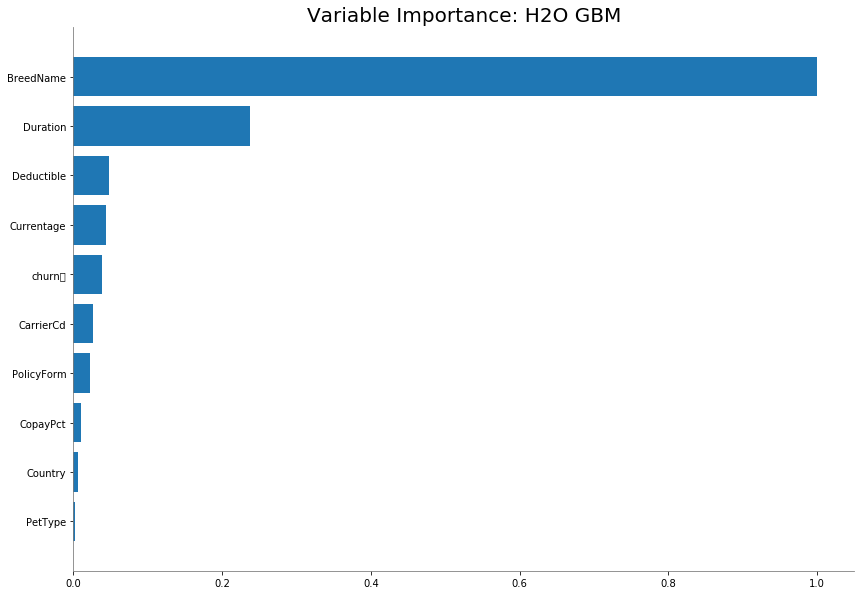

[(u'BreedName', 3001.515869140625, 1.0, 0.6954392509567462),
 (u'Duration', 714.5468139648438, 0.23806198105140397, 0.16555764578366747),
 (u'Deductible', 145.5462646484375, 0.04849091958661188, 0.033722488795517175),
 (u'Currentage',
  132.99461364746094,
  0.04430914892531923,
  0.030814321339154918),
 (u'churn\r', 116.32158660888672, 0.03875428006389024, 0.02695124749899979),
 (u'CarrierCd', 81.49369049072266, 0.027150844454490727, 0.018881762930274156),
 (u'PolicyForm', 65.9045181274414, 0.02195707802348244, 0.015269813893849458),
 (u'CopayPct', 32.75590896606445, 0.010913122033715222, 0.007589413412726477),
 (u'Country', 18.750301361083984, 0.006246943937182132, 0.0043443700124427284),
 (u'PetType', 6.170522212982178, 0.00205580196207621, 0.0014296853766216885)]

In [31]:
import matplotlib.pyplot as plt
best_gbm2.varimp_plot()
best_gbm2.varimp()

In [22]:
import subprocess
from IPython.display import Image

In [23]:
mojo_file_name = "/home/jash/Desktop/petplan/treeshyper/my_gbm_mojo.zip"
h2o_jar_path= '/home/jash/Desktop/petplan/trees/h2o-3.20.0.4/h2o.jar'
mojo_full_path = mojo_file_name
gv_file_path = "/home/jash/Desktop/petplan/treeshyper/my_gbm_graph.gv"

In [24]:
image_file_name = "/home/jash/Desktop/petplan/treeshyper/my_gbm_tree_bestall_minrows1000"

In [25]:
best_gbm2.download_mojo(mojo_file_name)

'/home/jash/Desktop/petplan/treeshyper/my_gbm_mojo.zip'

In [26]:

def generateTree(h2o_jar_path, mojo_full_path, gv_file_path, image_file_path, tree_id = 0):
    image_file_path = image_file_path + "_" + str(tree_id) + ".png"
    result = subprocess.call(["java", "-cp", h2o_jar_path, "hex.genmodel.tools.PrintMojo", "--tree", str(tree_id), "-i", mojo_full_path , "-o", gv_file_path ], shell=False)
    result = subprocess.call(["ls",gv_file_path], shell = False)
    if result is 0:
        print("Success: Graphviz file " + gv_file_path + " is generated.")
    else: 
        print("Error: Graphviz file " + gv_file_path + " could not be generated.")

In [27]:
def generateTreeImage(gv_file_path, image_file_path, tree_id):
    image_file_path = image_file_path + "_" + str(tree_id) + ".png"
    result = subprocess.call(["dot", "-Tpng", gv_file_path, "-o", image_file_path], shell=False)
    result = subprocess.call(["ls",image_file_path], shell = False)
    if result is 0:
        print("Success: Image File " + image_file_path + " is generated.")
        print("Now you can execute the follow line as-it-is to see the tree graph:") 
        print("Image(filename='" + image_file_path + "\')")
    else:
        print("Error: Image file " + image_file_path + " could not be generated.")

In [28]:

generateTree(h2o_jar_path, mojo_full_path, gv_file_path, image_file_name, 0)

Success: Graphviz file /home/jash/Desktop/petplan/treeshyper/my_gbm_graph.gv is generated.


In [29]:
generateTreeImage(gv_file_path, image_file_name, 0)

Success: Image File /home/jash/Desktop/petplan/treeshyper/my_gbm_tree_bestall_minrows1000_0.png is generated.
Now you can execute the follow line as-it-is to see the tree graph:
Image(filename='/home/jash/Desktop/petplan/treeshyper/my_gbm_tree_bestall_minrows1000_0.png')


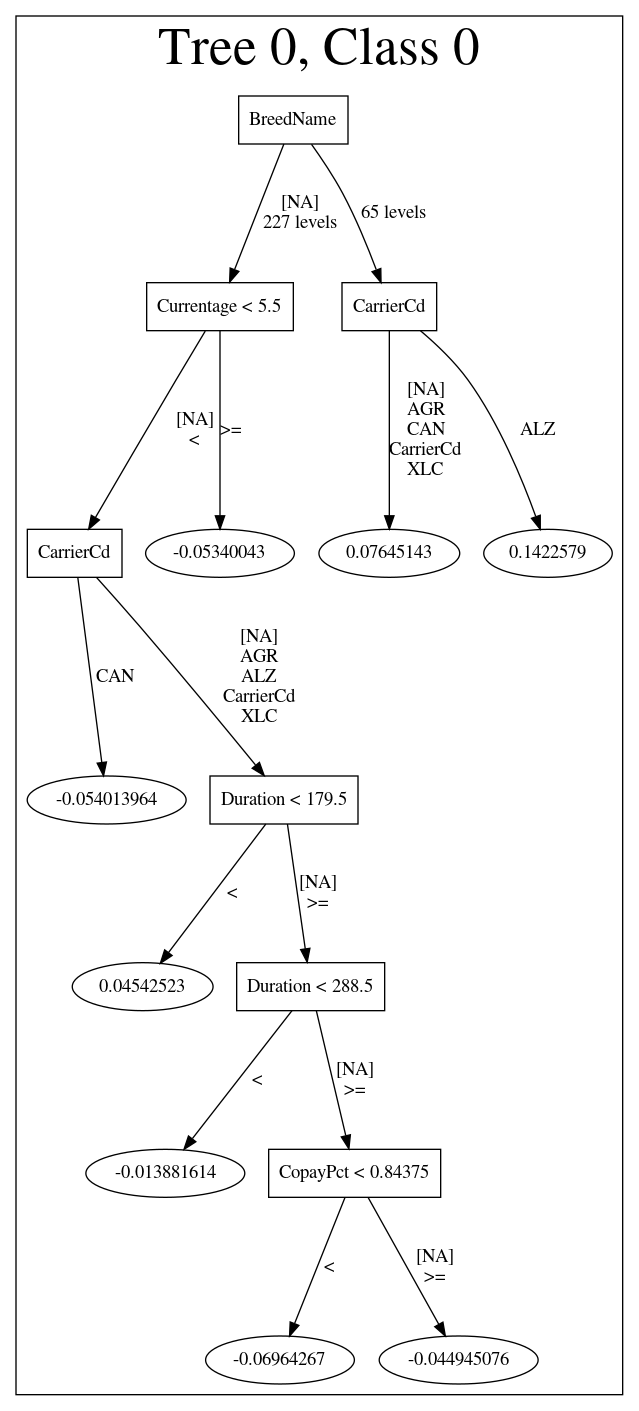

In [30]:
Image(filename='/home/jash/Desktop/petplan/treeshyper/my_gbm_tree_bestall_minrows1000_0.png')